In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from IPython.display import clear_output
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import TimeSeries
from project_specific_utils.dataloader import load_meg_data


In [2]:
from dataclasses import dataclass, field

@dataclass
class Cfg:
    sub_num = 3
    fs = 50
    model_name = "pixelwise_lum";
    sq_side = 250
    downsampling_sq_size = 50
cfg = Cfg()

In [3]:
sub_num = 3
sensors_group = "allsens"
fs = 100

file_path = f"{paths['data_dir']}/data/sub{sub_num:03d}/preprocessed/sub{sub_num:03d}_{sensors_group}_{fs}Hz_MNN0_badmuscle0_badlowfreq1_badsegint1_badcomp2.mat"
from scipy.io import loadmat
a = loadmat(file_path)

In [4]:
print(a.keys())
print(a['data_final'][0][0].shape)
print(a['data_final'][0].shape)
print(a['data_final'].shape)
labels = [str(x[0]) for x in a['label'].flatten()]
print(labels)



dict_keys(['__header__', '__version__', '__globals__', 'missingchan', 'data_final', 'time', 'label'])
(273, 87484)
(1,)
(6, 1)
['MLC11', 'MLC12', 'MLC13', 'MLC14', 'MLC15', 'MLC16', 'MLC17', 'MLC21', 'MLC22', 'MLC23', 'MLC24', 'MLC25', 'MLC31', 'MLC32', 'MLC41', 'MLC42', 'MLC51', 'MLC52', 'MLC53', 'MLC54', 'MLC55', 'MLC61', 'MLC62', 'MLC63', 'MLF11', 'MLF12', 'MLF13', 'MLF14', 'MLF21', 'MLF22', 'MLF23', 'MLF24', 'MLF25', 'MLF31', 'MLF32', 'MLF33', 'MLF34', 'MLF35', 'MLF41', 'MLF42', 'MLF43', 'MLF44', 'MLF45', 'MLF46', 'MLF51', 'MLF52', 'MLF53', 'MLF54', 'MLF55', 'MLF56', 'MLF61', 'MLF62', 'MLF63', 'MLF64', 'MLF65', 'MLF66', 'MLF67', 'MLO11', 'MLO12', 'MLO13', 'MLO14', 'MLO21', 'MLO22', 'MLO23', 'MLO24', 'MLO31', 'MLO32', 'MLO33', 'MLO34', 'MLO41', 'MLO42', 'MLO43', 'MLO44', 'MLO51', 'MLO52', 'MLO53', 'MLP11', 'MLP12', 'MLP21', 'MLP22', 'MLP23', 'MLP31', 'MLP32', 'MLP33', 'MLP34', 'MLP35', 'MLP41', 'MLP42', 'MLP43', 'MLP44', 'MLP45', 'MLP51', 'MLP52', 'MLP53', 'MLP54', 'MLP55', 'MLP56',

In [5]:
d, lab = load_meg_data(paths, 3, 1, "occ", 100)

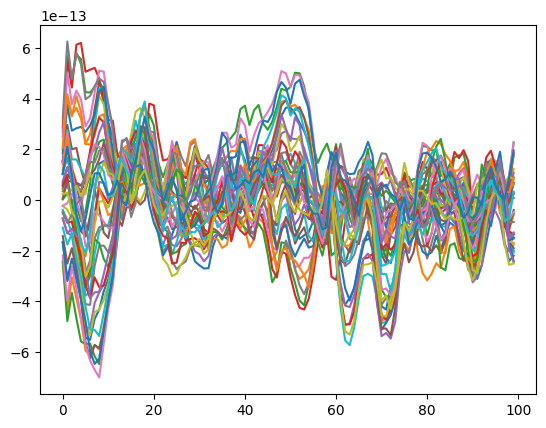

In [12]:
plt.plot(d.get_array()[:, :100].T);